<a href="https://colab.research.google.com/github/SilaWahome/Stocks-Module/blob/master/Indepth_Safaricom_stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We struggle to make decisions on our stocks investments, I have taken time to gather this data from Safaricom PLC and use it as a guide for young investors in the Kenyan Market. I am open for corrections and any guidance.

In [1]:
pip install QuantLib-Python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 6.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import yfinance
import pandas as pd
import QuantLib as qt
import datetime

In [3]:
df=pd.read_csv("/content/drive/MyDrive/LELESTA/Safaricom.csv")

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Volume
0,09/08/2023,15.3,16.20,15.30,15.50,"8,584,700"
1,09/07/2023,15.3,15.45,15.20,15.25,"1,374,300"
2,09/06/2023,15.2,15.30,15.05,15.10,"23,586,000"
3,09/05/2023,15.4,15.40,15.05,15.10,"11,102,200"
4,09/04/2023,15.3,15.30,15.00,15.10,"802,900"


Fixing the date to fix inconsistencies in the date method

In [5]:
# Convert it to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

lets check for blanks in the data

In [6]:
#checking for missing values
missing_data = df.isna()
#counting missing values
missing_count = df.isna().sum()
#checking for a missing value on a specific date
date_column_missing = df['Date'].isna()

print("Missing Data in the Entire DataFrame:")
print(missing_data)
print("\nCount of Missing Values in Each Column:")
print(missing_count)
print("\nMissing Values in the 'Date' Column:")
print(date_column_missing)

Missing Data in the Entire DataFrame:
      Date   Open   High    Low  Close  Volume
0    False  False  False  False  False   False
1    False  False  False  False  False   False
2    False  False  False  False  False   False
3    False  False  False  False  False   False
4    False  False  False  False  False   False
..     ...    ...    ...    ...    ...     ...
244  False  False  False  False  False   False
245  False  False  False  False  False   False
246  False  False  False  False  False   False
247  False  False  False  False  False   False
248  False  False  False  False  False   False

[249 rows x 6 columns]

Count of Missing Values in Each Column:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing Values in the 'Date' Column:
0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: Date, Length: 249, dtype: bool


We want to get a trend line of the performance of the stock for the last one year

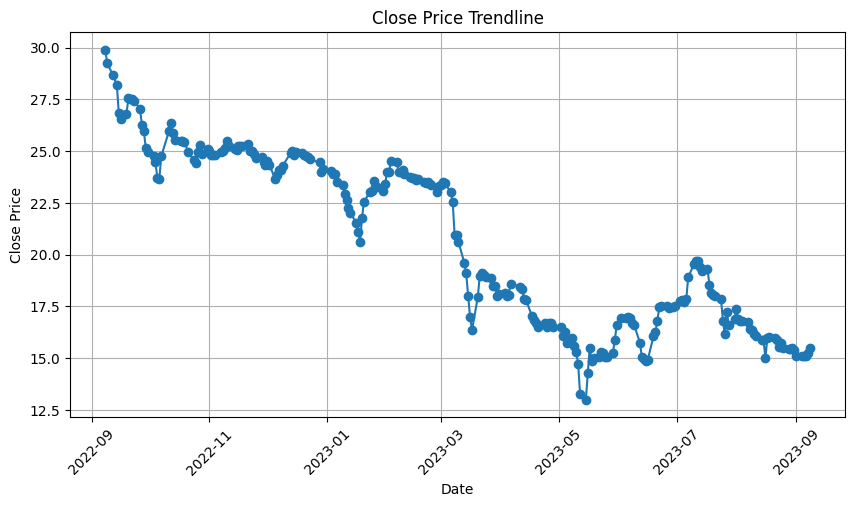

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title('Close Price Trendline')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [8]:
df.describe()


,Open,High,Low,Close
count,249.000000,249.000000,249.000000,249.000000
mean,20.838956,21.053614,20.362651,20.625100
std,4.127346,4.129534,4.112828,4.139937
min,13.250000,14.300000,12.700000,13.000000
25%,16.950000,17.000000,16.500000,16.700000
50%,21.000000,21.000000,20.000000,20.600000
75%,24.500000,24.950000,24.250000,24.450000
max,30.000000,30.000000,29.700000,29.900000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close']]], **{})
chart

A higher standard deviation indicates greater variability or dispersion in the data.
A lower standard deviation suggests that the data points are closer to the mean, indicating less variability.
Standard deviation is often used to assess the risk or volatility associated with financial data. Higher standard deviations may imply greater price fluctuations, which can be seen as riskier.

In [9]:
df.head(3)


,Date,Open,High,Low,Close,Volume
0,2023-09-08,15.3,16.20,15.30,15.50,"8,584,700"
1,2023-09-07,15.3,15.45,15.20,15.25,"1,374,300"
2,2023-09-06,15.2,15.30,15.05,15.10,"23,586,000"


In [10]:
df.tail(3)

,Date,Open,High,Low,Close,Volume
246,2022-09-12,29.00,29.00,28.4,28.65,"13,162,200"
247,2022-09-09,29.95,29.95,28.8,29.25,"3,144,600"
248,2022-09-08,30.00,30.00,29.7,29.90,"3,071,200"


In [11]:
date1 = pd.to_datetime('2022-09-08')
date2 = pd.to_datetime('2023-09-08')

row1 = df[df['Date'] == date1]
row2 = df[df['Date'] == date2]

# Extract the "Close" prices for the two dates
close_price1 = row1['Close'].values[0]
close_price2 = row2['Close'].values[0]

# Calculate the difference in closing prices
price_difference = close_price2 - close_price1

# Print the result
print(f"The difference in the closing prices between {date1.date()} and {date2.date()} is {price_difference:.2f}")

percentage_difference = ((close_price2 - close_price1) / close_price1) * 100

# Print the result
print(f"The percentage difference in the closing prices between {date1.date()} and {date2.date()} is {percentage_difference:.2f}%")

The difference in the closing prices between 2022-09-08 and 2023-09-08 is -14.40
The percentage difference in the closing prices between 2022-09-08 and 2023-09-08 is -48.16%


We want to find the future value of the stock price, based on the assumption that Safaricom PLC keeps the growth rate of 5.2% Year on Year

In [12]:
#(Future Value (FV) = Present Value (PV) * (1 + Growth Rate)^n)

FV is the future value (the target price on date1).
PV is the present value (the current price).
Growth Rate is the annual growth rate (5.2% or 0.052 as a decimal).
n is the number of years it will take.

n = log(FV / PV) / log(1 + Growth Rate)
 we want to solve for n which is the time it will take for the stock price to be the same as 29.90

In [13]:
import math
current_price = 15.50  # Replace with the current price
target_price_date1 = 29.90  # Replace with the price on date1
annual_growth_rate = 0.052

# Calculate the number of years (n)
n = math.log(target_price_date1 / current_price) / math.log(1 + annual_growth_rate)

# Print the result
print(f"It will take approximately {n:.2f} years for the current price to reach the price on date1.")

It will take approximately 12.96 years for the current price to reach the price on date1.


We would love to do a prediction on the next 6 months performance and see what that would present for us

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
monthly_mean = df['Close'].resample('M').mean()
monthly_mean= monthly_mean.reset_index()  # Reset the index first
monthly_mean.columns = ['Date', 'Close Price']  # Rename the columns

# Print the monthly means DataFrame
print(monthly_mean)








         Date  Close Price
0  2022-09-30    27.218750
1  2022-10-31    25.028947
2  2022-11-30    24.977273
3  2022-12-31    24.465789
4  2023-01-31    22.792857
5  2023-02-28    23.742500
6  2023-03-31    19.750000
7  2023-04-30    17.379412
8  2023-05-31    15.247727
9  2023-06-30    16.527500
10 2023-07-31    18.150000
11 2023-08-31    16.032609
12 2023-09-30    15.191667


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Root Mean Squared Error (RMSE): 6.136439430249334


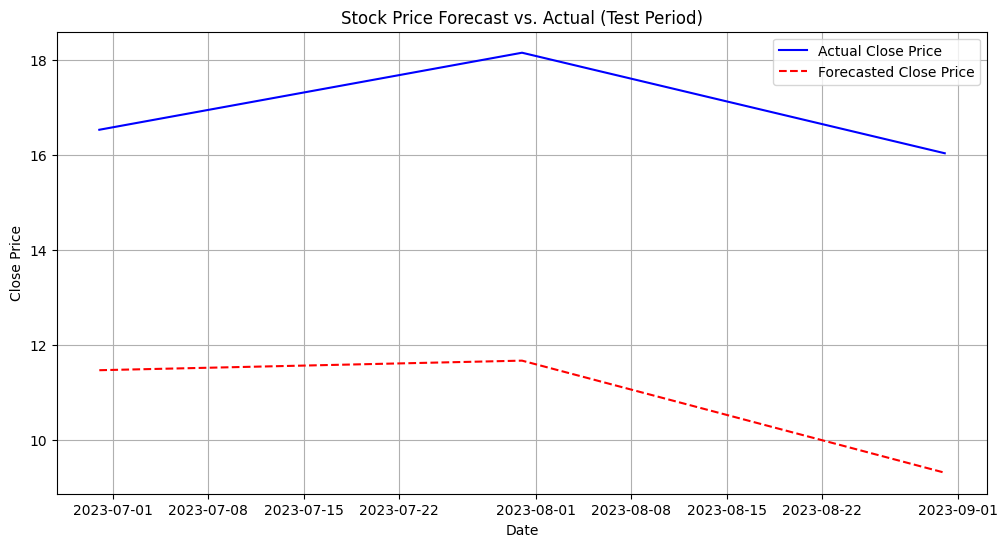

In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error


# Sample DataFrame with monthly mean data
data = {
    'Date': ['2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
    'Close Price': [27.218750, 25.028947, 24.977273, 24.465789, 22.792857, 23.742500, 19.750000, 17.379412, 15.247727, 16.527500, 18.150000, 16.032609],
}

# Create a DataFrame from the provided data
data_df = pd.DataFrame(data)

# Ensure data is sorted chronologically by the date column
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.sort_values(by='Date', inplace=True)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data_df) * 0.8)
train_data, test_data = data_df[:train_size], data_df[train_size:]

# Fit the ARIMA model on the training data
model = ARIMA(train_data['Close Price'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the values for the testing period
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

predicted_data = pd.DataFrame({'Date': test_data['Date'], 'Predicted Close Price': forecast})

# Calculate RMSE (Root Mean Squared Error) as a measure of model accuracy
mse = mean_squared_error(test_data['Close Price'], forecast)
rmse = mse**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close Price'], label='Actual Close Price', color='blue')
plt.plot(test_data['Date'], forecast, label='Forecasted Close Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecast vs. Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
print(predicted_data)

         Date  Predicted Close Price
9  2023-06-30              11.463424
10 2023-07-31              11.665036
11 2023-08-31               9.304456


In [18]:
# Provided data
cash_flows = [109227, 108223, 104043, 110014, 99996]  # in million Kenyan Shillings
discount_rate = 0.2460  # 24.60%

# Calculate the present value of each cash flow and display them
present_values = [cf / (1 + discount_rate) ** (i + 1) for i, cf in enumerate(cash_flows[::-1])]

for year, pv in zip(range(2019, 2024), present_values):
    print(f"Year {year}: Present Value = {pv} million Kenyan Shillings")





Year 2019: Present Value = 80253.61155698235 million Kenyan Shillings
Year 2020: Present Value = 70861.74957295126 million Kenyan Shillings
Year 2021: Present Value = 53784.69860306535 million Kenyan Shillings
Year 2022: Present Value = 44900.10941827023 million Kenyan Shillings
Year 2023: Present Value = 36369.70630146757 million Kenyan Shillings
